# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis
- Investigate the relationships between features
- Highlight insights that can inform the stakeholders' decisions
- Go through the next steps that will be used in feature engineering and machine learning

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [2]:
data = pd.read_csv('../data/coffee_cleaned.csv')
# Add a column for day (of month)
data['day'] = pd.to_datetime(data['transaction_date']).dt.day
data.head()

,transaction_date,store_location,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,day
0,2023-01-01,Lower Manhattan,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,1
1,2023-01-01,Lower Manhattan,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1
2,2023-01-01,Lower Manhattan,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,1
3,2023-01-01,Lower Manhattan,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1
4,2023-01-01,Lower Manhattan,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1


In [3]:
data.shape

(149116, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  149116 non-null  object 
 1   store_location    149116 non-null  object 
 2   transaction_qty   149116 non-null  int64  
 3   unit_price        149116 non-null  float64
 4   Total_Bill        149116 non-null  float64
 5   product_category  149116 non-null  object 
 6   product_type      149116 non-null  object 
 7   product_detail    149116 non-null  object 
 8   Size              149116 non-null  object 
 9   Month Name        149116 non-null  object 
 10  Day Name          149116 non-null  object 
 11  Hour              149116 non-null  int64  
 12  day               149116 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 14.2+ MB


In [5]:
data.isna().sum()

transaction_date    0
store_location      0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
day                 0
dtype: int64

In [6]:
# Predefine figsize
figsize1_1 = (8, 6)
figsize1_2 = (16, 5)

# Time-series analysis of sales and purchases

## Sales and purchases (number of transactions)

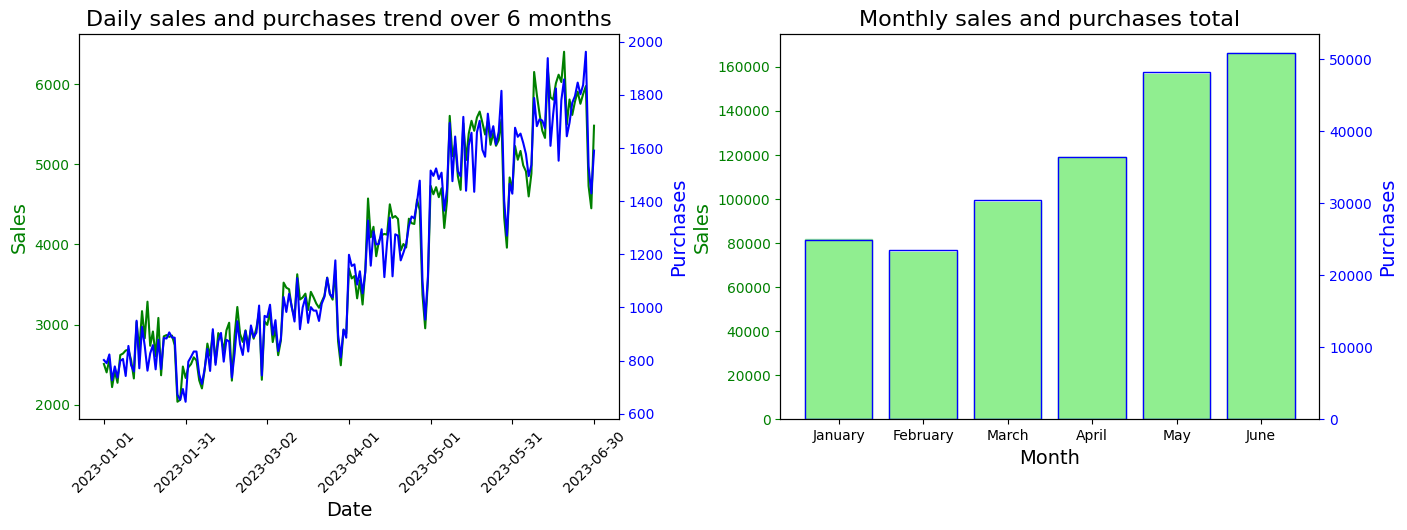

In [32]:
daily_sales = data.groupby('transaction_date')['Total_Bill'].sum()
daily_purchase = data.groupby('transaction_date')['transaction_qty'].sum()

monthly_sales = data.groupby('Month Name')['Total_Bill'].sum()
monthly_sales = monthly_sales.reindex(index=['January', 'February', 'March', 'April', 'May', 'June'])
monthly_purchase = data.groupby('Month Name')['transaction_qty'].sum()
monthly_purchase = monthly_purchase.reindex(index=['January', 'February', 'March', 'April', 'May', 'June'])

fig0, (ax0, ax2) = plt.subplots(1, 2, figsize=figsize1_2)

font_large = 16
font_med = 14

# Plotting the trends
ax1 = ax0.twinx()
ax0.plot(daily_sales.index, daily_sales, color='green')
ax1.plot(daily_purchase.index, daily_purchase, color='blue')

# Customize figure
ax0.set_xticks(ax0.get_xticks()[::30])  # Show only every 30th label (monthly)
ax0.set_xlabel('Date', size=font_med)
ax0.set_ylabel('Sales', color='green', size=font_med)
ax0.tick_params('x', rotation=45)
ax0.tick_params('y', colors='green')
ax1.set_ylabel('Purchases', color='blue', size=font_med)
ax1.tick_params('y', colors='blue')
ax0.set_title('Daily sales and purchases trend over 6 months', size=font_large)

# Plotting the trends
ax3 = ax2.twinx()
ax2.bar(monthly_sales.index, monthly_sales, color='lightgreen', edgecolor='lightgreen')
ax3.bar(monthly_purchase.index, monthly_purchase, color='none', edgecolor='blue')

# Customize figure
ax2.set_xlabel('Month', size=font_med)
ax2.set_ylabel('Sales', color='green', size=font_med)
ax2.tick_params('y', colors='green')
ax3.set_ylabel('Purchases', color='blue', size=font_med)
ax3.tick_params('y', colors='blue')
ax2.set_title('Monthly sales and purchases total', size=font_large)

plt.subplots_adjust(wspace=0.3)
plt.title
plt.show()

### Insights
1. **Daily Sales Trend**: The fluctuations in sales and purchases may have been affected by days of the week, holidays, or marketing promotions. Another thing I noticed is the consistent dip in every near-end/start of the month. Over the provided period, the sales have found an increase, indicative of continuous business growth. 
2. **Monthly Sales Trend**: The collected data spans for 6 months, where some months are more sales productive than others. More data across several years might provide a better insight on how annual seasonality affects sales and purchases.

## Correlation plot
We're including the correlation matrix early in this EDA to confirm the relationship between `transaction_qty` and `Total_Bill`, along with other relevant quantitative variables.

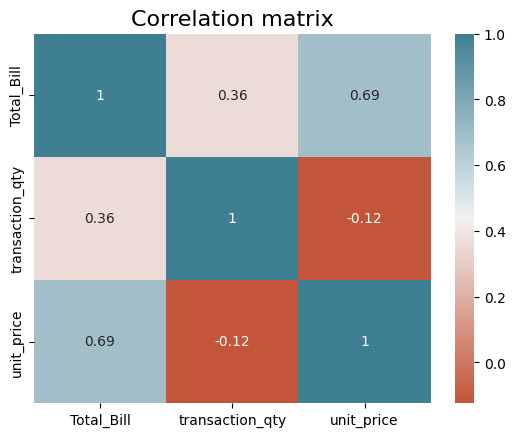

In [34]:
correl_data = data[['Total_Bill', 'transaction_qty', 'unit_price']]
correl_matrix = correl_data.corr()

fig1, ax0 = plt.subplots()

palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(correl_matrix, annot=True, cmap=palette)
plt.title('Correlation matrix', size=font_large)
plt.show()

The heatmap show the correlation between the variables transaction quantity, total bill, and unit price. 
### Insights
- A moderate positive correlation ($0.4<r<0.8$) is found between total bill and unit price, meaning, customers that purchase highly-priced items tend to accumulate a larger bill.
- A weak positive correlation ($0<r<0.4$) is observed between total bill and unit price, suggesting that product quantity plays a role in determining the total bill, but to a lesser extent.

## Daily sales per transaction by month
Since we already know there is continuous growth over the sales, I want to look into the average result of each transaction.

Text(0.5, 1.0, 'Sales per transaction, per day of month\n(averaged over 6 months)')

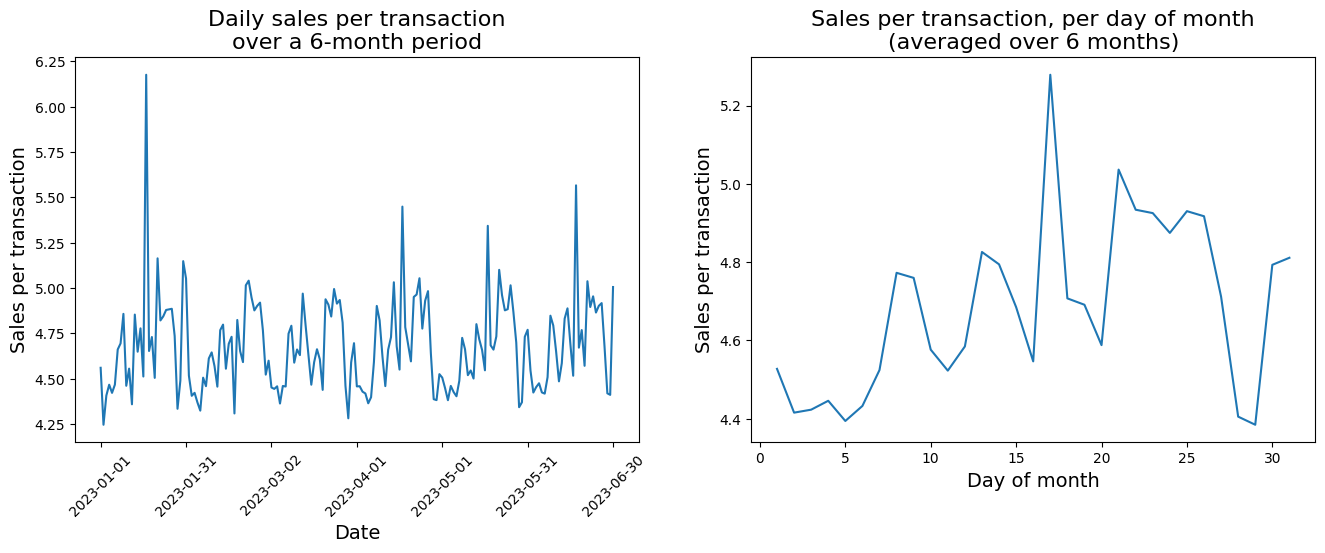

In [40]:
monthly_trend = data.copy()

daily_sales_per_transac_6months = monthly_trend.groupby('transaction_date')['Total_Bill'].mean()
daily_sales_per_transac_by_month = monthly_trend.groupby('day')['Total_Bill'].mean()

fig2, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize1_2)

ax0.plot(daily_sales_per_transac_6months.index, daily_sales_per_transac_6months.values)

ax0.set_xticks(ax0.get_xticks()[::30])  # Show only every 30th label (monthly)
ax0.tick_params('x', rotation=45)
ax0.set_xlabel('Date', size=font_med)
ax0.set_ylabel('Sales per transaction', size=font_med)
ax0.set_title('Daily sales per transaction\nover a 6-month period', size=font_large)

ax1.plot(daily_sales_per_transac_by_month.index, daily_sales_per_transac_by_month.values)

ax1.set_xlabel('Day of month', size=font_med)
ax1.set_ylabel('Sales per transaction', size=font_med)
ax1.set_title('Sales per transaction, per day of month\n(averaged over 6 months)', size=font_large)


### Insights
1. **Periodic trend**: The periodic movement of sales per transaction reveals a buying pattern among customers (left plot). Common among the months is the extended increase of sales per transaction for days 21-26.
2. **Strong days**: The right plot highlights the surge of sales per transaction during the 21st to the 26th days of the month.

## Daily sales per week

3860.923676923077


Text(0.5, 1.0, 'Average daily sales over different days of the week')

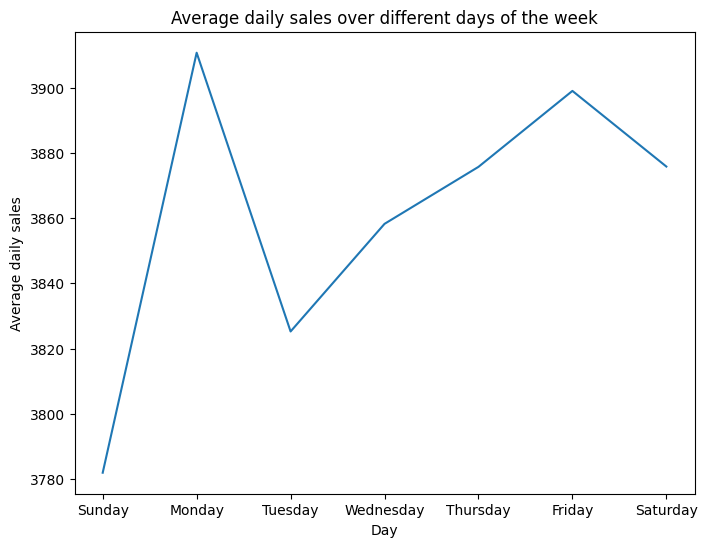

In [86]:
total_sales_per_day_of_week = data.groupby('Day Name')['Total_Bill'].sum()
total_sales_per_day_of_week = total_sales_per_day_of_week.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

unique_dates = data.drop_duplicates('transaction_date')
days_of_week_count = unique_dates['Day Name'].value_counts(sort=True)
avg_daily_sales_per_week = total_sales_per_day_of_week / days_of_week_count

print(avg_daily_sales_per_week.mean())

fig3, ax0 = plt.subplots(figsize=figsize1_1)

ax0.plot(avg_daily_sales_per_week.index, avg_daily_sales_per_week.values)

ax0.set_xlabel('Day')
ax0.set_ylabel('Average daily sales')
ax0.set_title('Average daily sales over different days of the week')


### Insights
- **Rest days**: The data reveals distinct weekly patterns in cafe sales. Mondays consistently exhibit the highest sales, possibly indicating customers' desire to start their workweeks on a high note with empowering beverages. Tuesdays appear to be a slump day for the cafe, and the sales pick back up until Friday. Since some people work or go out on Saturdays, the sales only go down a bit, but it eventually goes down by Sunday, which is considered a rest day. 
### Strategic Implications 
- These findings can optimize revenue potential by targeting marketing promotions on peak days and implementing strategies to boost sales on slower days.

## Hourly sales per day

Text(0.5, 1.0, 'Average hourly sales in a day')

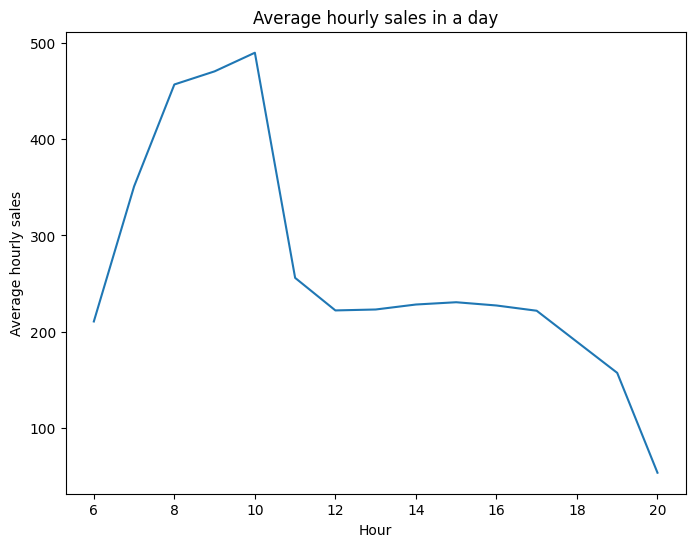

In [87]:
total_sales_per_hour_of_day = data.groupby('Hour')['Total_Bill'].sum()

unique_dates = data.drop_duplicates(['transaction_date', 'Hour'])

hours_of_day_count = unique_dates['Hour'].value_counts(sort=True).sort_index(ascending=True)

avg_hourly_sales_per_day = total_sales_per_hour_of_day / hours_of_day_count

fig4, ax0 = plt.subplots(figsize=figsize1_1)

ax0.plot(avg_hourly_sales_per_day.index, avg_hourly_sales_per_day.values)

ax0.set_xlabel('Hour')
ax0.set_ylabel('Average hourly sales')
ax0.set_title('Average hourly sales in a day')

### Insights
1. **Morning hump**: The right plot for sales per hour in a day exhibit the behavior of customers along the clock. The sales peak from hours 8 to 10, which makes sense because people want to break off from a sleepy mood through stimulating drinks. After these hours, the sales activity become more distributed from hours 11 to 19.
2. The sales disparity between the peak hours and regular hours is two-fold, indicating a significant difference. Using this insight can help in optimizing task allocation among employees throughout the workday.

# Product analysis

## Distribution of product categories

0.020054086818669277
0.7413018137734881


(array([], dtype=float64), [])

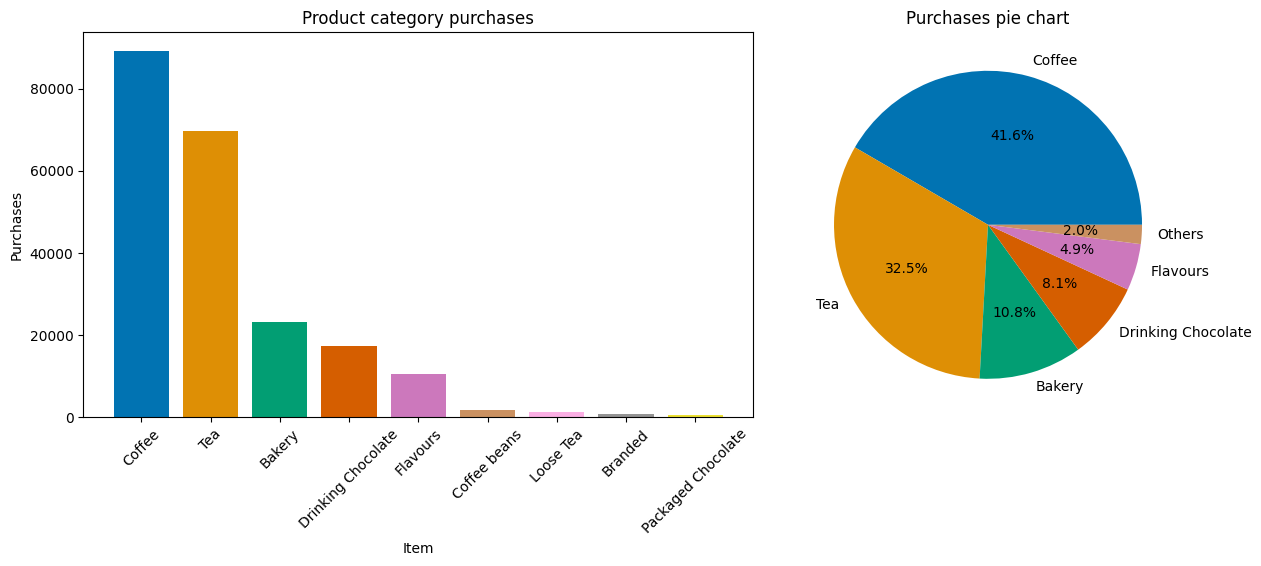

In [88]:
product_cat_distribution = data.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)
colorblind_palette = sns.color_palette("colorblind")
fig5, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize1_2)

ax0.bar(product_cat_distribution.index.values, product_cat_distribution, color=colorblind_palette)
ax0.set_xlabel('Item')
ax0.set_ylabel('Purchases')
ax0.set_title('Product category purchases')
ax0.xaxis.set_tick_params(rotation=45)

threshold_pie = 1 * product_cat_distribution.sum() / 100
small_portions = product_cat_distribution[product_cat_distribution < threshold_pie]
others_value = small_portions.sum()

print(others_value / product_cat_distribution.sum())
print((product_cat_distribution['Coffee']+product_cat_distribution['Tea']) / product_cat_distribution.sum())

new_distrib = product_cat_distribution.drop(small_portions.index)
new_distrib['Others'] = others_value

ax1.pie(new_distrib.values, labels=new_distrib.index, colors=colorblind_palette, autopct='%1.1f%%')
ax1.set_title('Purchases pie chart')

plt.subplots_adjust(wspace=-.15)
plt.xticks(rotation=45)

### Insights
1. **Most Valuable Products**: With a first glance at the pie chart, we see that coffee and tea products lead to 74.13% of the purchasess. 
2. **Non-performing Items**: On the other side of the distribution, coffee beans, loose tea, branded items, and packaged chocolate only constitute 2.00% of the items sold.

## Unit price for different categories

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Coffee'),
  Text(1, 0, 'Tea'),
  Text(2, 0, 'Drinking Chocolate'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Flavours'),
  Text(5, 0, 'Loose Tea'),
  Text(6, 0, 'Coffee beans'),
  Text(7, 0, 'Packaged Chocolate'),
  Text(8, 0, 'Branded')])

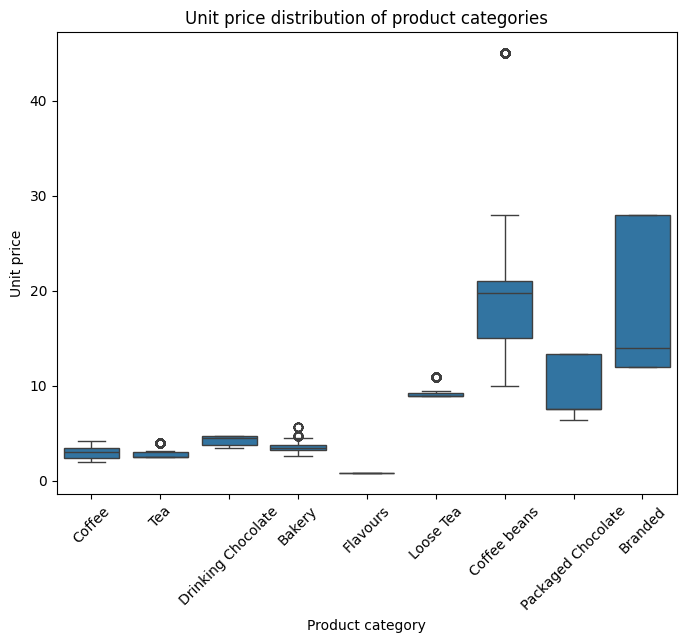

In [89]:
fig6, ax0 = plt.subplots(figsize=figsize1_1)

sns.boxplot(x='product_category', y='unit_price', data=data)

ax0.set_xlabel('Product category')
ax0.set_ylabel('Unit price')
ax0.set_title('Unit price distribution of product categories')
plt.xticks(rotation=45)

### Insights
1. **Unit price as a selling point**: As a supplement to the distribution of purchases, it's noteworthy that the four product categories with the highest unit prices—loose tea, coffee beans, packaged chocolate, and branded items—exhibited the lowest sales volumes. This pattern highlights a tendency for higher-priced items to sell less frequently. Conversely, products with lower prices, which also had minimal variation around their unit prices, were more frequently purchased. 
2. **For immediate consumption**: Furthermore, upon classifying the product categories based on their consumption windows, another noteworthy consumer behavior emerges. Products demanding immediate consumption show higher sales frequencies, whereas those not requiring immediate use or falling into the non-consumable category demonstrate comparatively lower sales volumes.

### Strategic implication
- Coffee shops inherently attract customers seeking immediately consumable products. Therefore, while certain items may exhibit lower sales volumes, their presence remains valuable as they contribute to passive sales without requiring extensive labor or maintenance. Nevertheless, several measures can enhance the sales performance of these items. These include implementing targeted marketing promotions, diversifying product variants, and introducing more affordable static items into the product lineup.

## Drink size distribution

Text(0.5, 1.0, 'Distribution of drink sizes purchased')

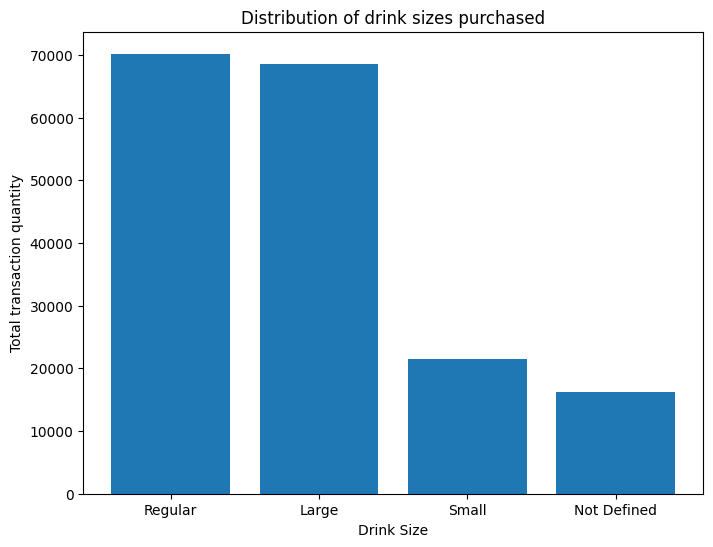

In [90]:
drink_list = ['Coffee', 'Tea', 'Drinking Chocolate']
drink_df = data[data['product_category'].isin(drink_list)]

drink_size = drink_df.groupby('Size')['transaction_qty'].sum().sort_values(ascending=False)

fig7, ax0 = plt.subplots(figsize=figsize1_1)

ax0.bar(drink_size.index, drink_size.values)
ax0.set_xlabel('Drink Size')
ax0.set_ylabel('Total transaction quantity')
ax0.set_title('Distribution of drink sizes purchased')

### Insights
1. Missing values are not fixable. Several of the products have `Not Defined` values that map to a single unit price, e.g. Latte and Cappuccino have a large size for $4.25 with the other uncategorized size-price at $3.75. 
2. Despite the missing value, the trend is clear that Regular and Large drinks are more purchased. 

## Transaction distribution

Text(0.5, 1.0, 'Distribution of purchase volumes per transaction')

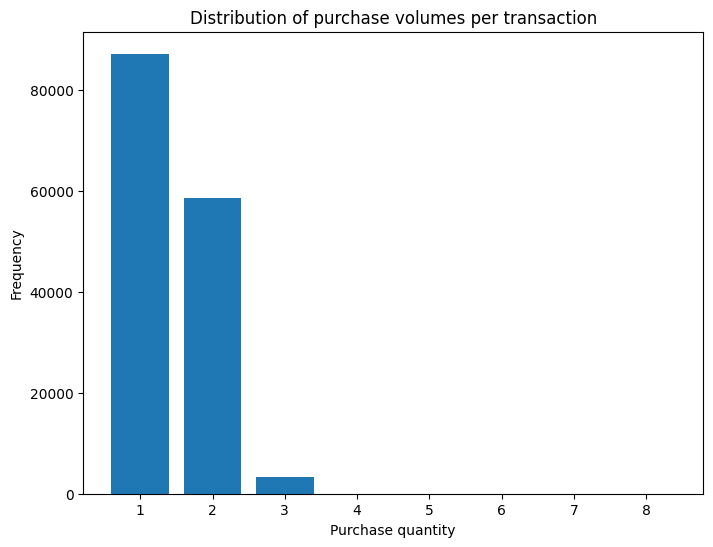

In [91]:
transaction_qty_count = data.groupby('transaction_qty').size()

fig8, ax0 = plt.subplots(figsize=figsize1_1)

ax0.bar(transaction_qty_count.index, transaction_qty_count.values)

ax0.set_xlabel('Purchase quantity')
ax0.set_ylabel('Frequency')
ax0.set_title('Distribution of purchase volumes per transaction')


### Insights
- The distribution of purchase quantity shows that majority of the customers opt to buy only 1-2 items per transaction. This inclination likely indicates that patrons typically frequent the café alone or in pairs.

# Store insights

## Total transactions in different stores

Text(0.5, 1.0, 'Distribution of product purchases per store')

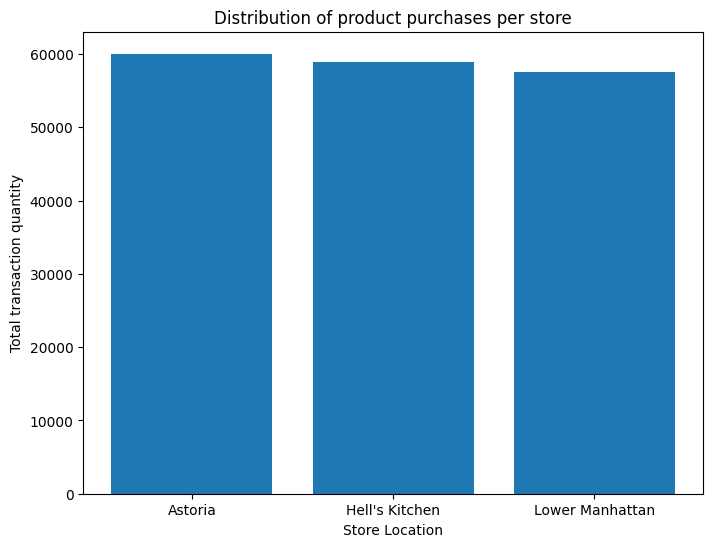

In [92]:
store_transactions = drink_df.groupby('store_location')['transaction_qty'].sum().sort_values(ascending=False)

fig9, ax0 = plt.subplots(figsize=figsize1_1)

ax0.bar(store_transactions.index, store_transactions.values)

ax0.set_xlabel('Store Location')
ax0.set_ylabel('Total transaction quantity')
ax0.set_title('Distribution of product purchases per store')

### Insights
- The distribution of product purchases among the three stores is near identical, indicating a balanced performance among the coffee shop branches.

## Product category performance across each store

Text(0.5, 1.0, 'Distribution of each product category purchased per store')

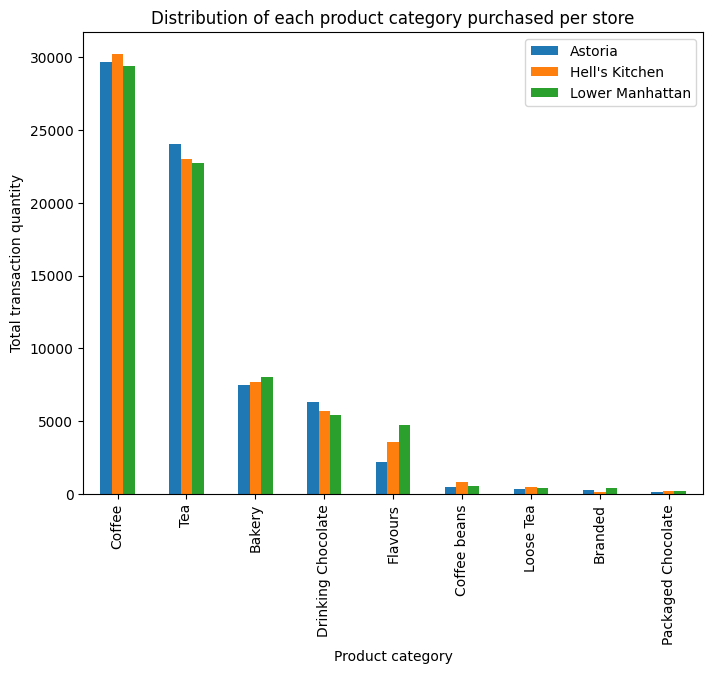

In [93]:
pivot_df = data.pivot_table(index='product_category', columns='store_location', values='transaction_qty', aggfunc='sum')

# Reset index to convert product_category from index to a regular column
pivot_df.reset_index(inplace=True)

# Extract the 'product_category' column as a separate Series
product_category_column = pivot_df['product_category']

# Drop the 'product_category' column from the DataFrame
pivot_df.drop(columns=['product_category'], inplace=True)

# Concatenate the 'product_category' column back to the DataFrame as the first column
pivot_df = pd.concat([product_category_column, pivot_df], axis=1)

index_list = product_cat_distribution.index.tolist()
store_prod_cat = pivot_df.set_index('product_category').reindex(index_list)
pivot_df.head(9)

store_prod_cat.plot(figsize=figsize1_1, kind='bar')

plt.xlabel('Product category')
plt.ylabel('Total transaction quantity')
plt.title('Distribution of each product category purchased per store')

### Insights
- Moreover, across the board, most product categories show comparable purchase volumes across all three stores. This suggests that there are no clear favorite-differences for specific product categories among the stores.

### Key Takeaways
1. The coffee shop business is continuously growing over the 6-month period.
2. Monthly sales reveal a pattern of a slight increase in sales per transaction for days 21 to 26 every month.
3. In terms of weeks, Monday and Fridays have the best average daily sales, while Sunday and Tuesday have the less performing average daily sales.
4. Hours 8 to 10 are the busiest ordering times at the cafe (along with revenue), while hours 11 to 19 have a moderate level of activity. Through clock-scheduled promotions, these busy hours can be further capitalized on or the moderate hours can be boosted into more balance of hourly performance.
5. Coffee and tea collectively contribute to 74% of the total income, whereas items not intended for immediate consumption constitute only 2% of the overall revenue.
6. The items not for immediate consumption also happen to be the most expensive items, while the rest of the product categories have more affordable prices. A change of roster or marketing promotions for the stock items might improve the performance of these items. 
7. Regular and Large are the most preferred drink sizes. 
8. Transactions generally come in one or two purchases.
9. The three store locations have similar levels of selling performance.